In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('IRIS.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Checking some basic info about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h4>Here we can see that there are no <b>NULL</b> values present in the dataset.</h4>

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

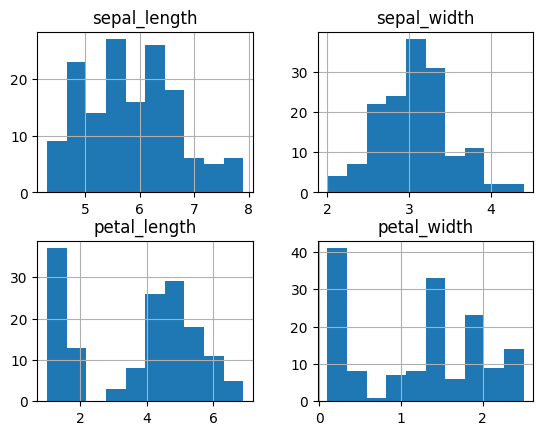

In [7]:
df.hist()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
#Plotting scatterplot to visualize the relationships between features determining the type of flower
colors=['red', '#FFD700', 'blue']
species=[0, 1, 2]

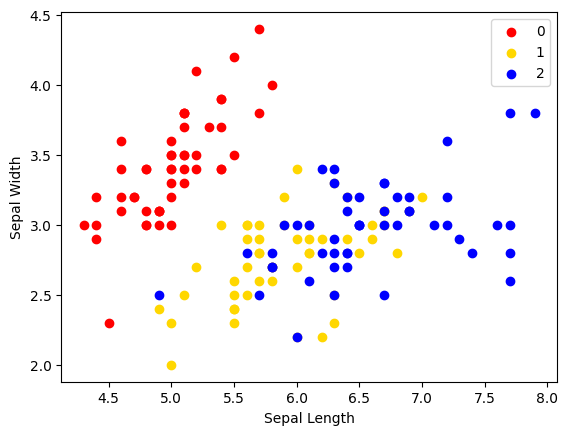

In [32]:
#Sepal lenght vs Sepal Width
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

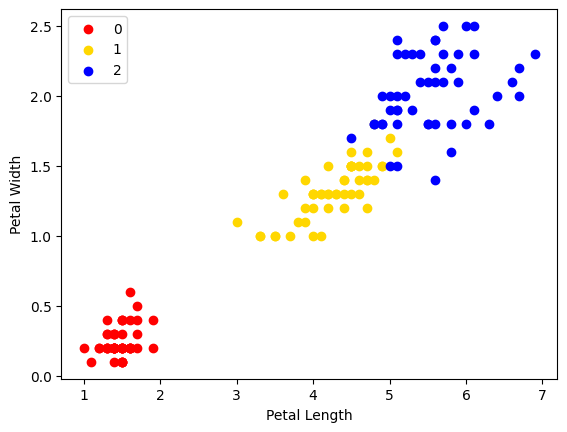

In [33]:
#Petal lenght vs Petal Width
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

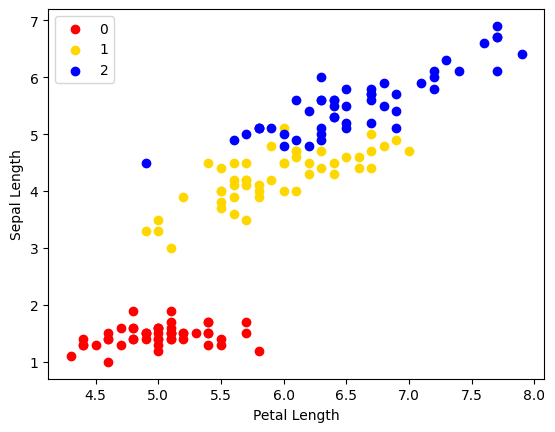

In [35]:
#Petal lenght vs Sepal Length
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend()

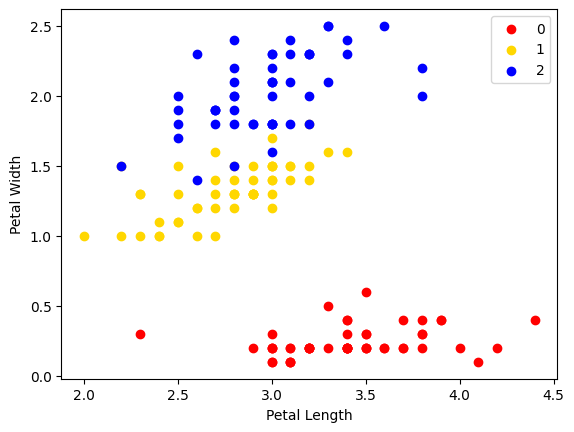

In [36]:
#Sepal Width vs Petal Width
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

In [37]:
#Correlation Matrix of the dataset
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

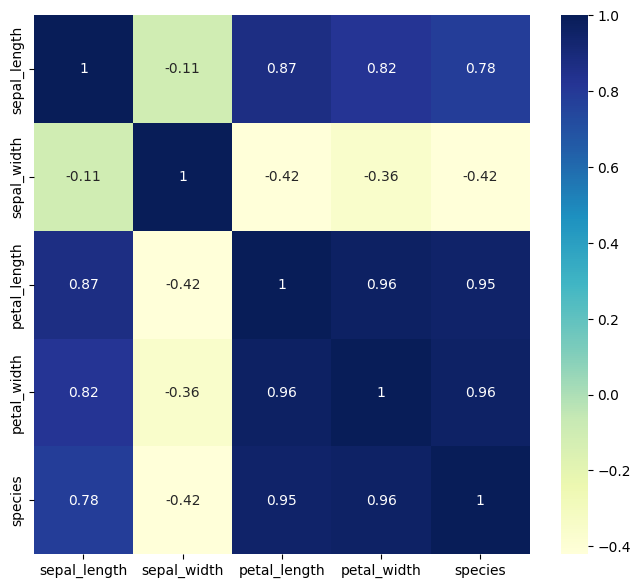

In [44]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

In [47]:
from sklearn.model_selection import train_test_split
x = df.drop(['species'], axis=1)
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [48]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [56]:
print("The accuracy of the Logistic Regression model is: ")
print(log.score(x_test, y_test)*100)

The accuracy of the Logistic Regression model is: 
90.0


In [51]:
#Now using the Decision Tree Model for prediction
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier()
tr.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
print("The accuracy of the Decision Tree model is: ")
print(tr.score(x_test, y_test)*100)

The accuracy of the Decision Tree model is: 
93.33333333333333


In [57]:
#Now using the K Nearest Neighbours Model for prediction
from sklearn.neighbors import KNeighborsClassifier
cl = KNeighborsClassifier()
cl.fit(x_train, y_train)

KNeighborsClassifier()

In [55]:
print("The accuracy of the K Nearest Neighbours model is: ")
print(cl.score(x_test, y_test)*100)

The accuracy of the K Nearest Neighbours model is: 
93.33333333333333


<h3>From the above testing, we can come to the conclusion that both <b><i>K Nearest Neighbours Model</i></b> and <b><i>Decision Tree Model<i></b> provides better results than <b><i>Logistic Regression Model</i></b></h3>